In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_preprocessed.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 18691 non-null  int64  
 1   age                         18508 non-null  float64
 2   gender_cd                   18433 non-null  float64
 3   region_size                 11402 non-null  object 
 4   foreign_flg                 11402 non-null  float64
 5   entrepreneur_flg            11402 non-null  float64
 6   auto_flg                    11402 non-null  float64
 7   traveler_flg                11402 non-null  float64
 8   partnership_flg             11402 non-null  float64
 9   child_amt                   11402 non-null  float64
 10  realty_type                 11402 non-null  object 
 11  segment_cd                  11402 non-null  object 
 12  bundle_nm                   18691 non-null  object 
 13  confirmed_income            140

In [4]:
data = data[data['functional_cd'] == 'Preapprove']

In [5]:
numeric_columns = ['age', 'gender_cd', 'foreign_flg', 'entrepreneur_flg', 'auto_flg',
                   'traveler_flg', 'partnership_flg', 'child_amt', 'confirmed_income',
                   'predicted_income', 'state_talk_time_sec', 'emp_age', 'emp_gender_cd', 'emp_children_cnt',
                   'emp_work_months_cnt', 'day_of_week', 'holiday_flg', 'approval_flg', 'bundle_flg', 'segment_region',
                   'preapprove_flg', 'child_flg']
numeric_data = data[numeric_columns]

C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_26556\344103666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'age': 'Возраст клиента', 'gender_cd': 'Пол клиента', 'entrepreneur_flg': 'Флаг предпринимателя',


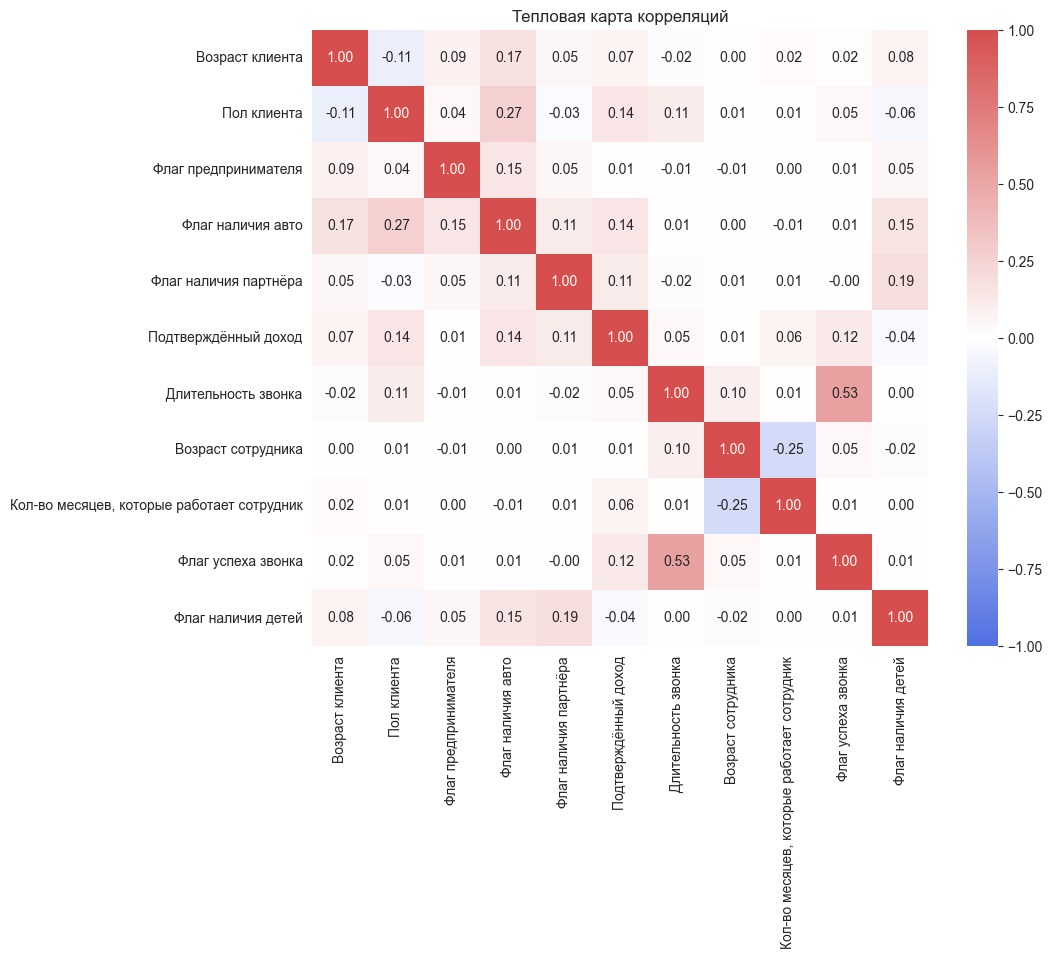

In [18]:
import matplotlib.colors as mcolors

colors = ["#5170E2", "#FFFFFF", "#D64E4E"]

cmap_name = "custom_cmap"
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

df1 = numeric_data[
    ['age', 'gender_cd', 'entrepreneur_flg', 'auto_flg', 'partnership_flg', 'confirmed_income', 'state_talk_time_sec',
     'emp_age', 'emp_work_months_cnt', 'approval_flg', 'child_flg']]
df1.rename(columns={'age': 'Возраст клиента', 'gender_cd': 'Пол клиента', 'entrepreneur_flg': 'Флаг предпринимателя',
                    'auto_flg': 'Флаг наличия авто',
                    'partnership_flg': 'Флаг наличия партнёра', 'confirmed_income': 'Подтверждённый доход',
                    'state_talk_time_sec': ' Длительность звонка', 'emp_age': 'Возраст сотрудника',
                    'emp_work_months_cnt': 'Кол-во месяцев, которые работает сотрудник',
                    'approval_flg': 'Флаг успеха звонка', 'child_flg': 'Флаг наличия детей'}, inplace=True)
correlation_matrix = df1.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Тепловая карта корреляций")
plt.show()

In [7]:
def get_cor_by_category(column):
    categories = data[column].unique()
    correlations_by_category = {}

    for category in categories:
        group_data = data[data[column] == category]
        correlations_by_category[category] = group_data.corr()

    return correlations_by_category

In [8]:
def get_cor_to_result(column):
    """Функция возвращает корреляцию к результату звонка от подаваемого признака"""
    unique_combinations = data.groupby([column, 'wo_hit_status_result_desc']).size().unstack()
    unique_combinations['total'] = unique_combinations['Дозвон, Отказ'] + unique_combinations['Дозвон, Успешно']
    unique_combinations['ratio_false'] = unique_combinations['Дозвон, Отказ'] / unique_combinations['total']
    unique_combinations['ratio_true'] = unique_combinations['Дозвон, Успешно'] / unique_combinations['total']
    return unique_combinations